<a href="https://colab.research.google.com/github/sathyajain12/Machine_learning_project/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,roc_auc_score


df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [12]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [16]:
model={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier()
}

results=[]

for name,model in model.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
  results.append([name, accuracy, precision, recall, f1, auc_roc])

  results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    })

In [17]:
results_df = pd.DataFrame(results)
print(results_df)

                            0         1          2       3         4         5
0          LogisticRegression       0.8   0.933333    0.56       0.7  0.825143
1                       Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC
2      DecisionTreeClassifier  0.633333   0.588235     0.4   0.47619       0.6
3                       Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC
4      RandomForestClassifier  0.716667       0.75    0.48  0.585366  0.825143
5                       Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC
6  GradientBoostingClassifier  0.733333   0.764706    0.52  0.619048  0.878857
7                       Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC


In [19]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3,4,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [20]:
best_model = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')

# Train the best Gradient Boosting model
best_model.fit(X_train, y_train)

# Predict the test set results
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

Best parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


Gradient Boosting Classifier (Optimized):
 Accuracy: 0.7333333333333333
 Precision: 0.7647058823529411
 Recall: 0.52
 F1 Score: 0.6190476190476191
 AUC-ROC: 0.8640000000000001



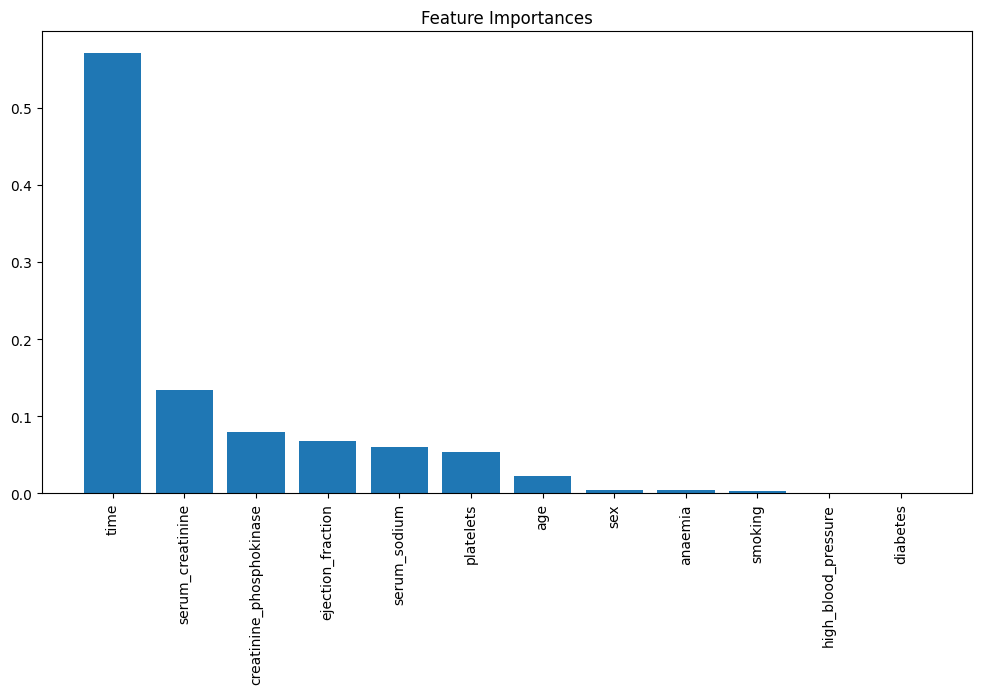

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba)

print(f'Gradient Boosting Classifier (Optimized):\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}\n AUC-ROC: {auc_roc}\n')

# Feature importance for Gradient Boosting
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [23]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.1 MB/s eta 0:00:00


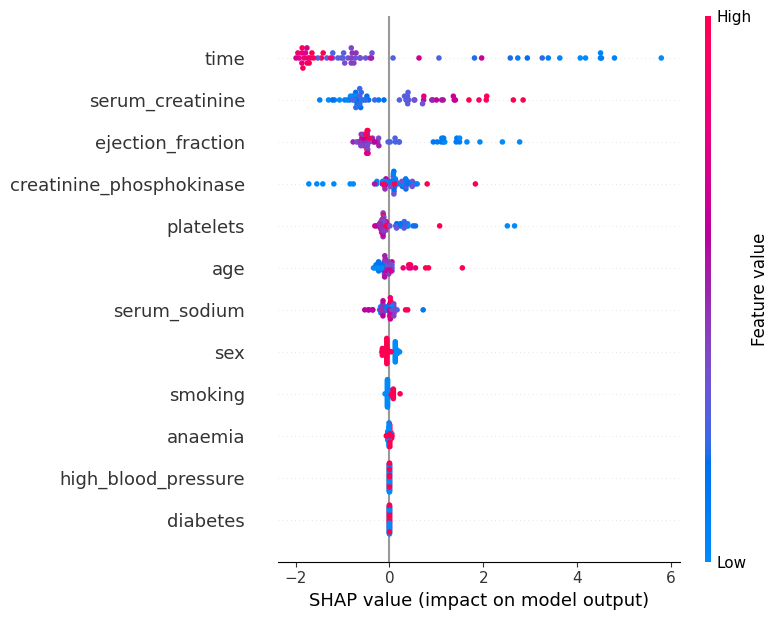

Cross-Validation F1 Scores: [0.54054054 0.57894737 0.49056604 0.08695652 0.        ]
Mean F1 Score: 0.33940209368731455
Standard Deviation: 0.24479039990394927


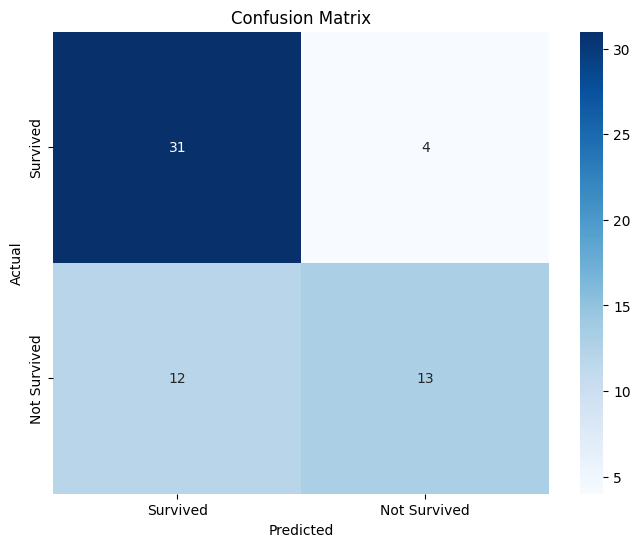

In [24]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=features)

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='f1')

print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean F1 Score: {np.mean(cv_scores)}')
print(f'Standard Deviation: {np.std(cv_scores)}')

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Not Survived'], yticklabels=['Survived', 'Not Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Re-train the model on the resampled data
best_model.fit(X_train_res, y_train_res)

# Re-evaluate the model
y_pred_res = best_model.predict(X_test)
y_proba_res = best_model.predict_proba(X_test)[:, 1]

accuracy_res = accuracy_score(y_test, y_pred_res)
precision_res = precision_score(y_test, y_pred_res)
recall_res = recall_score(y_test, y_pred_res)
f1_res = f1_score(y_test, y_pred_res)
auc_roc_res = roc_auc_score(y_test, y_proba_res)

print(f'Gradient Boosting Classifier (Resampled):\n Accuracy: {accuracy_res}\n Precision: {precision_res}\n Recall: {recall_res}\n F1 Score: {f1_res}\n AUC-ROC: {auc_roc_res}\n')


Gradient Boosting Classifier (Resampled):
 Accuracy: 0.7166666666666667
 Precision: 0.7
 Recall: 0.56
 F1 Score: 0.6222222222222222
 AUC-ROC: 0.8411428571428571

